In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = 'data_clean/MFC_ActualizacionJul2023_clean.pkl'
with open(in_file, 'rb') as f:
    df = load(f)
    
df.tail()

,Panteón_origen,Estatus_FC,Fecha_inhumación_date,Fecha_inhumación_date_diasemana,Fecha_inhumación_date_semanaaño,Fecha_defunción_date,Fecha_defunción_date_diasemana,Fecha_defunción_date_semanaaño,Restos_tipo,Sexo,Edad,Edad_int,Conocido_Desconocido,Primer_apellido,Segundo_apellido,Nombre(s),Nombre_completo,Institución_origen,Tipo_institución_origen
ID,,,,,,,,,,,,,,,,,,,
XX-P10757,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-10-31,Miércoles,44,Restos cremados,Masculino,25,25.0,Desconocido,,,,,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P10758,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-10-27,Sábado,43,Restos cremados,Masculino,45,45.0,Desconocido,,,,,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P10759,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-11-01,Jueves,44,Restos cremados,Femenino,40,40.0,Conocido,Hernandez,Gomez,Monica,Monica Hernandez Gomez,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P1076,Panteón Civil de Dolores,Inhumación,2018-07-25,Miércoles,30,2017-04-30,Domingo,17,Cadáver,Masculino,46,46.0,Conocido,Fuentes,Madrigal,Javier Guillermo,Javier Guillermo Fuentes Madrigal,Instituto Politecnico Nacional - Escuela Nacio...,Escuela pública
XX-P10760,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-11-15,Jueves,46,Restos cremados,Femenino,75,75.0,Conocido,Rios,Parada,Delia,Delia Rios Parada,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública


In [2]:
df.dtypes

Panteón_origen                           category
Estatus_FC                               category
Fecha_inhumación_date              datetime64[ns]
Fecha_inhumación_date_diasemana          category
Fecha_inhumación_date_semanaaño            UInt32
Fecha_defunción_date               datetime64[ns]
Fecha_defunción_date_diasemana           category
Fecha_defunción_date_semanaaño             UInt32
Restos_tipo                              category
Sexo                                     category
Edad                                       object
Edad_int                                  float64
Conocido_Desconocido                     category
Primer_apellido                            object
Segundo_apellido                           object
Nombre(s)                                  object
Nombre_completo                            object
Institución_origen                         object
Tipo_institución_origen                  category
dtype: object

In [4]:
df['Fecha_inhumación_date_diasemana']

ID
XX-DSA001          NaN
XX-DSA004       Martes
XX-DSA006       Martes
XX-DSA007       Martes
XX-DSA009          NaN
               ...    
XX-P10757    Miércoles
XX-P10758    Miércoles
XX-P10759    Miércoles
XX-P1076     Miércoles
XX-P10760    Miércoles
Name: Fecha_inhumación_date_diasemana, Length: 1000, dtype: category
Categories (7, object): ['Lunes' < 'Martes' < 'Miércoles' < 'Jueves' < 'Viernes' < 'Sábado' < 'Domingo']

<Axes: xlabel='ID'>

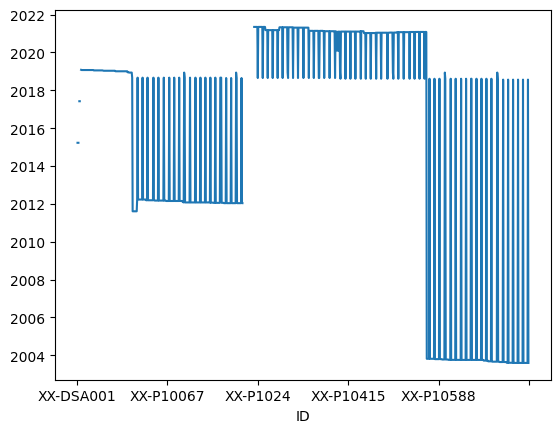

In [5]:
df['Fecha_inhumación_date'].plot()

<Axes: xlabel='ID'>

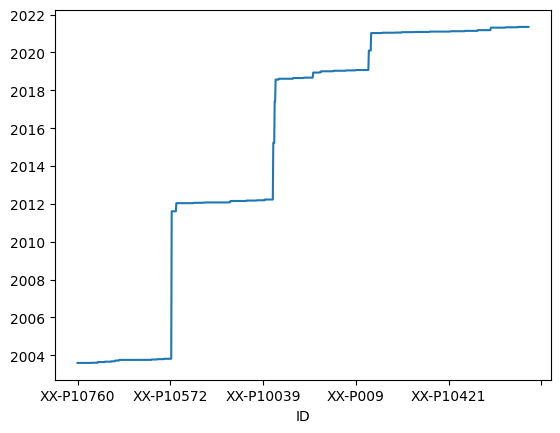

In [6]:
df['Fecha_inhumación_date'].sort_values().plot()

<Axes: xlabel='ID'>

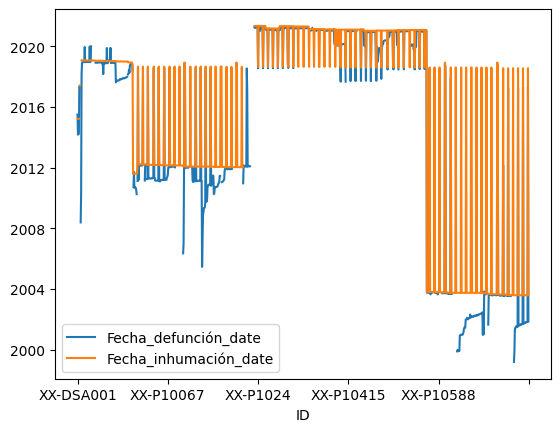

In [7]:
df[['Fecha_defunción_date', 'Fecha_inhumación_date']].plot()

<Axes: xlabel='Fecha_defunción_date', ylabel='Fecha_inhumación_date'>

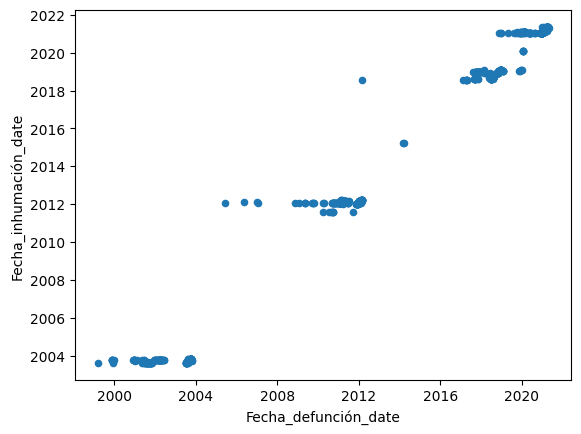

In [9]:
df.plot.scatter(x='Fecha_defunción_date', y='Fecha_inhumación_date', )

In [10]:
df['Restos_tipo'].value_counts()

Restos_tipo
Cadáver            721
Miembros           104
Restos cremados    101
Feto                46
Restos humanos      25
Restos óseos         2
Name: count, dtype: int64

<Axes: xlabel='Restos_tipo'>

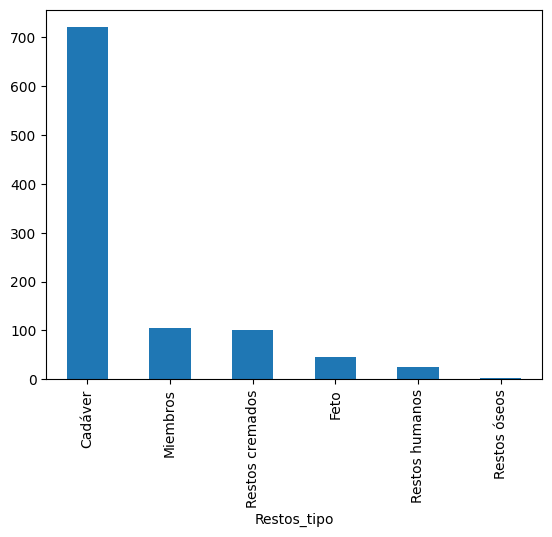

In [11]:
df['Restos_tipo'].value_counts().plot(kind='bar')

<Axes: ylabel='Restos_tipo'>

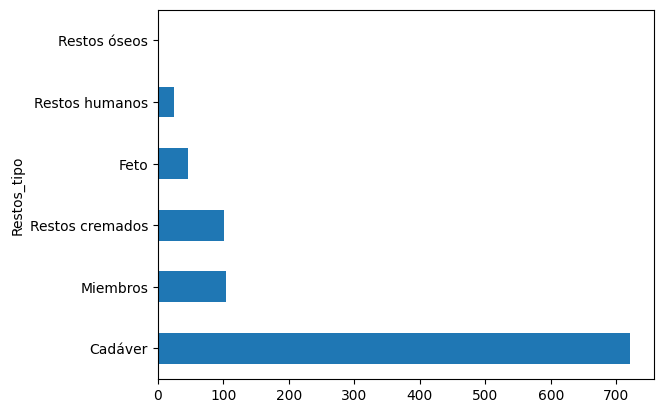

In [12]:
df['Restos_tipo'].value_counts().plot(kind='barh')

In [13]:
df_tipo_sexo = pd.pivot_table(df, index='Restos_tipo', columns='Sexo',
                             values='Panteón_origen', aggfunc='count')

df_tipo_sexo = df_tipo_sexo[['Masculino', 'Femenino', 'Indeterminado']]
df_tipo_sexo

Sexo,Masculino,Femenino,Indeterminado
Restos_tipo,,,
Cadáver,622,94,5
Restos humanos,10,10,5
Restos cremados,79,21,1
Restos óseos,1,0,1
Feto,23,13,10
Miembros,88,14,2


<Axes: xlabel='Restos_tipo'>

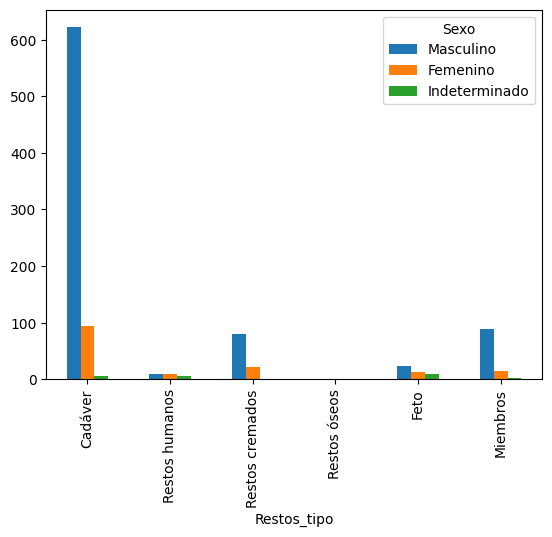

In [14]:
df_tipo_sexo.plot(kind='bar')

<Axes: xlabel='Restos_tipo'>

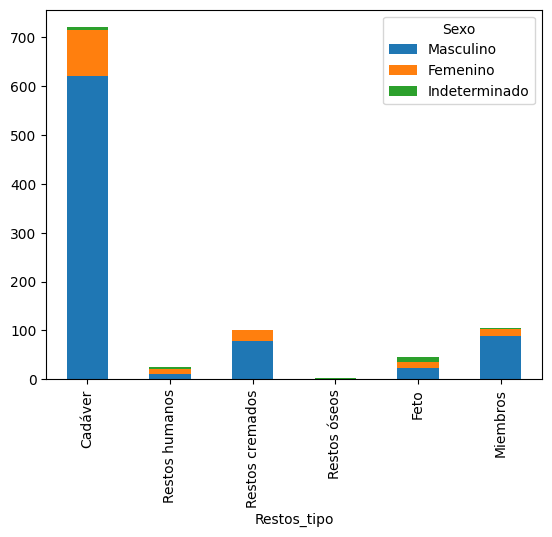

In [15]:
df_tipo_sexo.plot(kind='bar', stacked=True)

In [16]:
data_sexo = pd.pivot_table(df, values='Estatus_FC', index='Conocido_Desconocido', 
                           columns='Sexo', aggfunc='count')
data_sexo

Sexo,Femenino,Indeterminado,Masculino
Conocido_Desconocido,,,
Conocido,112,9,478
Desconocido,41,15,345


<Axes: title={'center': 'Sexo de conocidos y desconocidos'}, xlabel='Inhumaciones'>

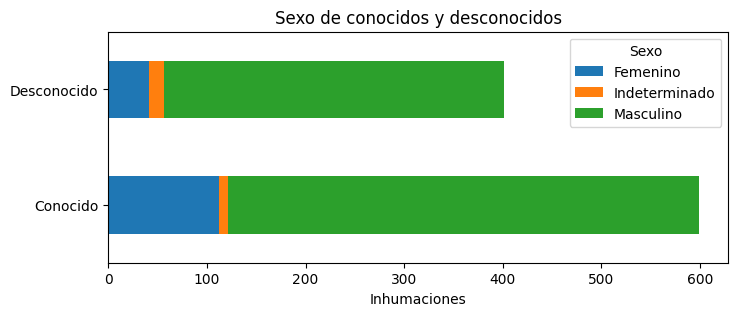

In [17]:
data_sexo.plot.barh(stacked=True, figsize=[8,3],
                    title='Sexo de conocidos y desconocidos',
                    xlabel='Inhumaciones', ylabel='',
                   )

In [18]:
data_restos = pd.pivot_table(df, values='Estatus_FC', index='Conocido_Desconocido',
                             columns='Restos_tipo', aggfunc='count')
data_restos

Restos_tipo,Cadáver,Restos humanos,Restos cremados,Restos óseos,Feto,Miembros
Conocido_Desconocido,,,,,,
Conocido,404,18,63,0,16,98
Desconocido,317,7,38,2,30,6


<Axes: title={'center': 'TIpo de restos de conocidos y desconocidos'}, xlabel='Inhumaciones'>

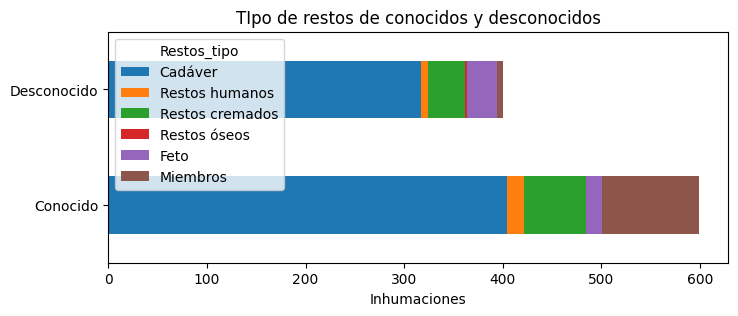

In [19]:
data_restos.plot.barh(stacked=True, figsize=[8,3],
                      xlabel='Inhumaciones', ylabel='',
                      title='TIpo de restos de conocidos y desconocidos',
)

In [20]:
dic_col ={'Femenino':'#bebada', 'Indeterminado':'#d9d9d9', 'Masculino':'#80b1d3', 
          'Restos cremados':'#b3de69','Cadáver':'#fb8072','Feto':'#fdb462',
          'Miembros':'#fccde5','Restos humanos':'#8dd3c7','Restos óseos':'#ffffb3',}
dic_col

{'Femenino': '#bebada',
 'Indeterminado': '#d9d9d9',
 'Masculino': '#80b1d3',
 'Restos cremados': '#b3de69',
 'Cadáver': '#fb8072',
 'Feto': '#fdb462',
 'Miembros': '#fccde5',
 'Restos humanos': '#8dd3c7',
 'Restos óseos': '#ffffb3'}

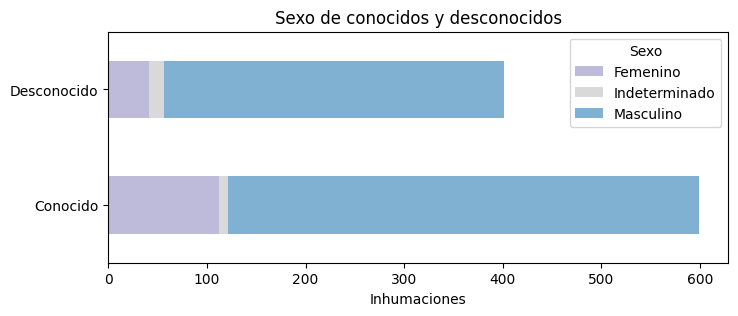

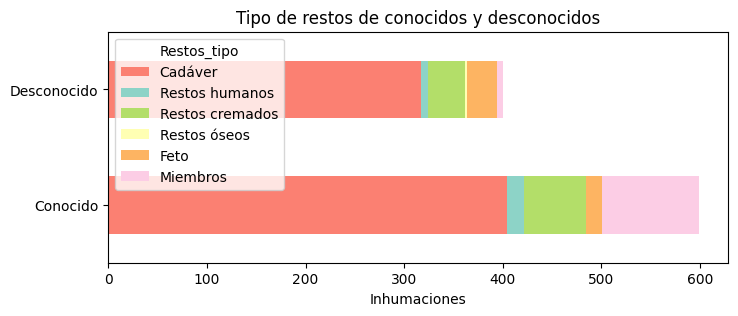

In [21]:
data_sexo.plot.barh(stacked=True, figsize=[8,3],
                    color=dic_col,
                    title='Sexo de conocidos y desconocidos',
                    xlabel='Inhumaciones', ylabel='',
)
plt.show() # Comando para desplegar la gráfica

data_restos.plot.barh(stacked=True, figsize=[8,3],
                      color=dic_col,
                      xlabel='Inhumaciones', ylabel='',
                      title='Tipo de restos de conocidos y desconocidos',
)
plt.show()

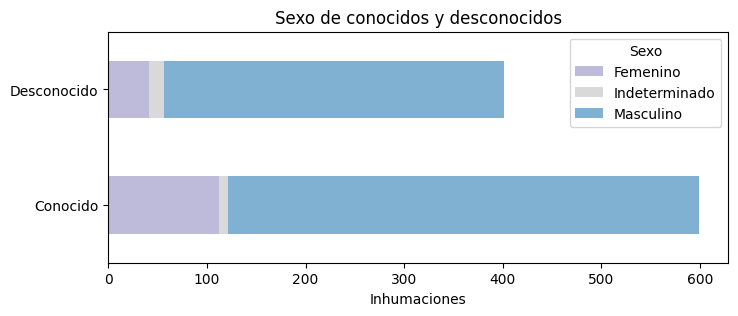

In [23]:
out_file_sexo = 'images/conocido_desconocido_vs_sexo.png'

data_sexo.plot.barh(stacked=True, figsize=[8,3],
                    color=dic_col,
                    title='Sexo de conocidos y desconocidos',
                    xlabel='Inhumaciones', ylabel='',                    
)
plt.savefig(out_file_sexo) # Comando para guardar la gráfica

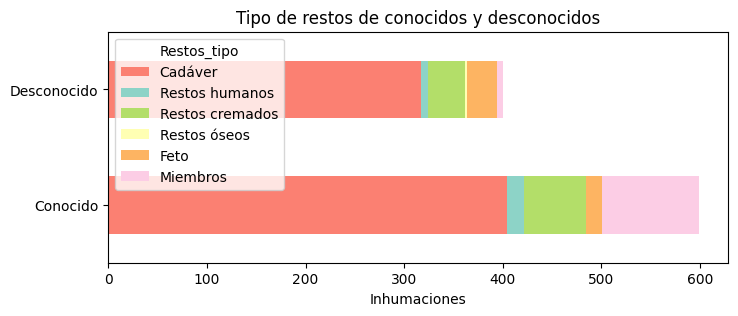

In [24]:
out_file_restos = 'images/conocido_desconocido_restos.png'

data_restos.plot.barh(stacked=True, figsize=[8,3],
                      color=dic_col,
                      xlabel='Inhumaciones', ylabel='',
                      title='Tipo de restos de conocidos y desconocidos',
)
plt.savefig(out_file_restos, dpi=200, pad_inches=0.5, transparent=True)

<Axes: >

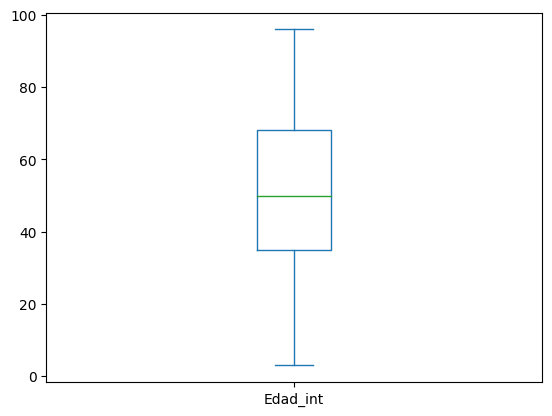

In [25]:
df['Edad_int'].plot.box()

<Axes: ylabel='Frequency'>

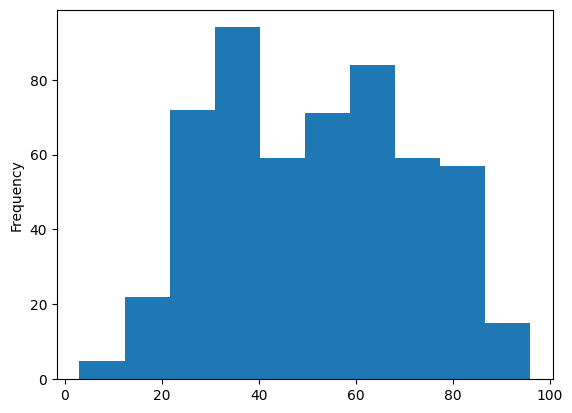

In [26]:
df['Edad_int'].plot.hist()

<Axes: ylabel='Frequency'>

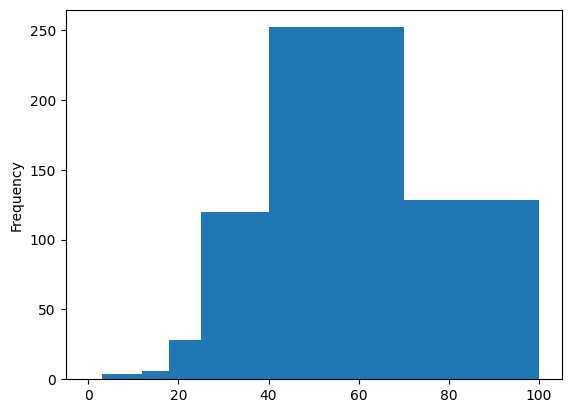

In [28]:
df['Edad_int'].plot.hist(bins=[0,3,12,18,25,40,70,100])

<Axes: ylabel='Density'>

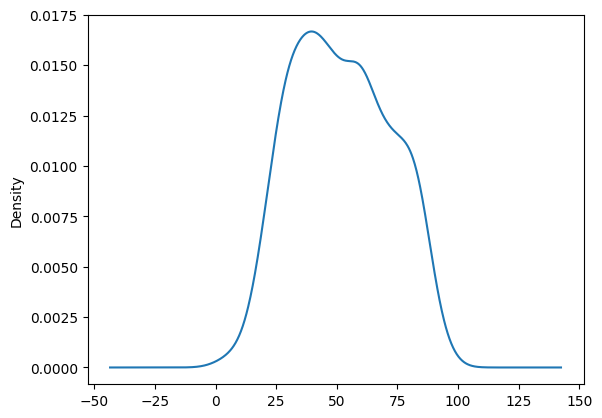

In [29]:
df['Edad_int'].plot(kind='kde')

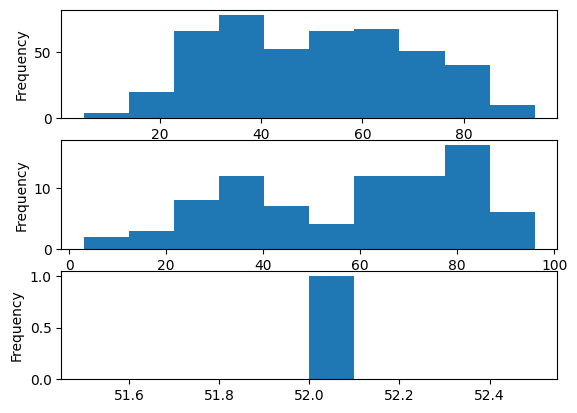

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1)

df.loc[df['Sexo'] == 'Masculino', 'Edad_int'] \
  .plot.hist(ax=axes[0])

df.loc[df['Sexo'] == 'Femenino', 'Edad_int'] \
  .plot.hist(ax=axes[1])

df.loc[df['Sexo'] == 'Indeterminado', 'Edad_int'] \
  .plot.hist(ax=axes[2])

plt.show()

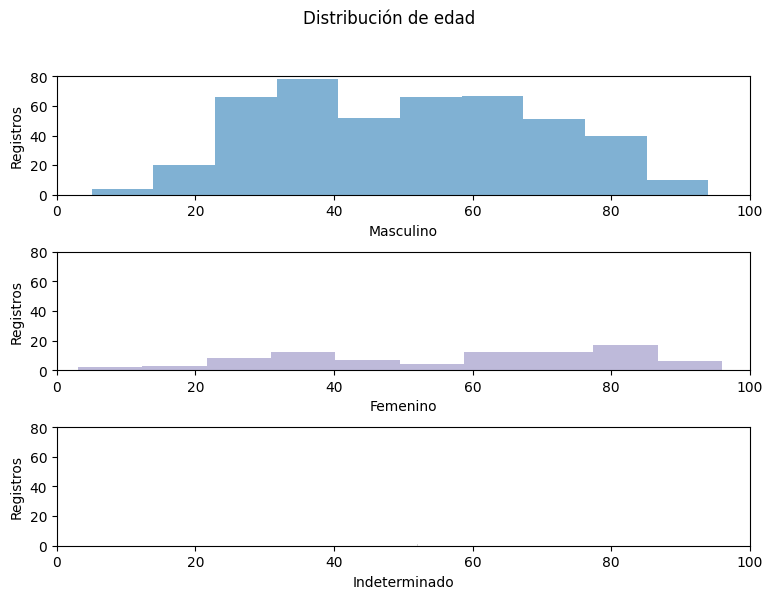

In [36]:
# fig es todo el espacio de graficación,
# mientras que axes, tendrá cada subgráfica
fig, axes = plt.subplots(nrows=3, ncols=1)

fig.suptitle('Distribución de edad')    # Si usamos subgráficas este es el título superior de la figura
fig.set_figheight(6)                    # Altura de la figura
fig.set_figwidth(8)                     # Ancho de la figura
fig.tight_layout(pad=2)                 # Espacio entre subgráficas

# Masculino gráfica 0
df.loc[df['Sexo'] == 'Masculino', 'Edad_int'] \
  .plot.hist(ax=axes[0],                # Posición en los subplots
            xlim=[0, 100], ylim=[0,80], # Valores mínimos y máximos en el eje x y y
            color=dic_col['Masculino']  # Consultamos el diccionario de colores para usar la codificación de color
           )

axes[0].set_xlabel('Masculino')         # La etiqueta del eje x
axes[0].set_ylabel('Registros')         # La etiqueta del eje y

# Femenino gráfica 1
df.loc[df['Sexo'] == 'Femenino', 'Edad_int'] \
  .plot.hist(ax=axes[1],
            xlim=[0,100], ylim=[0,80],
            color=dic_col['Femenino'],
           )

axes[1].set_xlabel('Femenino')
axes[1].set_ylabel('Registros')

# Indeterminado gráfica 3
df.loc[df['Sexo'] == 'Indeterminado', 'Edad_int'] \
  .plot.hist(ax=axes[2],
            xlim=[0,100], ylim=[0,80],
            color=dic_col['Indeterminado'],
           )

axes[2].set_xlabel('Indeterminado')
axes[2].set_ylabel('Registros')

plt.show() # Mostrar toda la figura


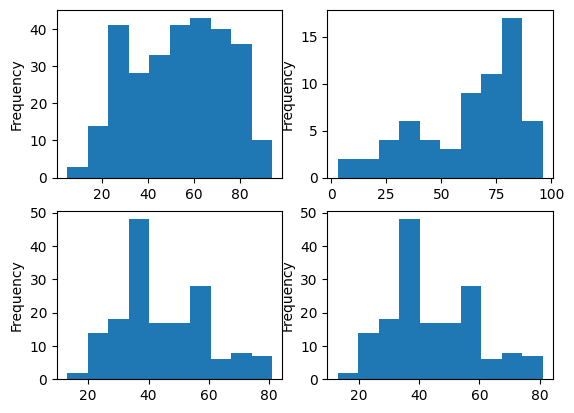

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df.loc[(df['Sexo'] == 'Masculino') & (df['Conocido_Desconocido'] == 'Conocido'), 'Edad_int'] \
  .plot.hist(ax=axes[0,0])

df.loc[(df['Sexo'] == 'Femenino') & (df['Conocido_Desconocido'] == 'Conocido'), 'Edad_int'] \
  .plot.hist(ax=axes[0,1])

df.loc[(df['Sexo'] == 'Masculino') & (df['Conocido_Desconocido'] == 'Desconocido'), 'Edad_int'] \
  .plot.hist(ax=axes[1,0])

df.loc[(df['Sexo'] == 'Masculino') & (df['Conocido_Desconocido'] == 'Desconocido'), 'Edad_int'] \
  .plot.hist(ax=axes[1,1])

plt.show()

<Axes: >

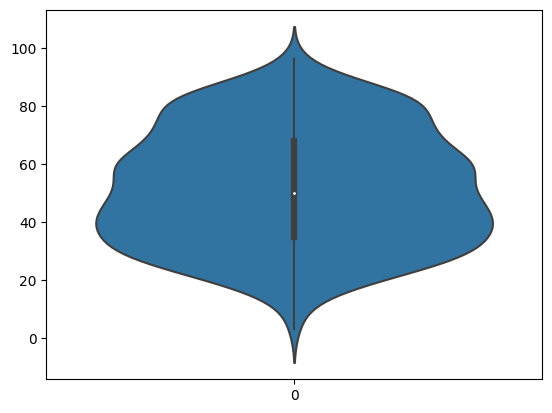

In [38]:

sns.violinplot(df['Edad_int'])

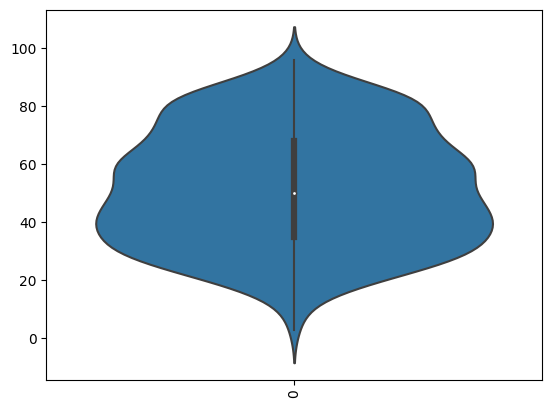

In [63]:
#sns.violinplot([df['Fecha_inhumación_date_semanaaño'], df['Fecha_defunción_date_semanaaño'], df['Edad_int']])
sns.violinplot(df['Edad_int'])
plt.xticks(rotation=90) # Rotar los nombres de las variables en el x
plt.show()

<Axes: xlabel='Conocido_Desconocido', ylabel='Edad_int'>

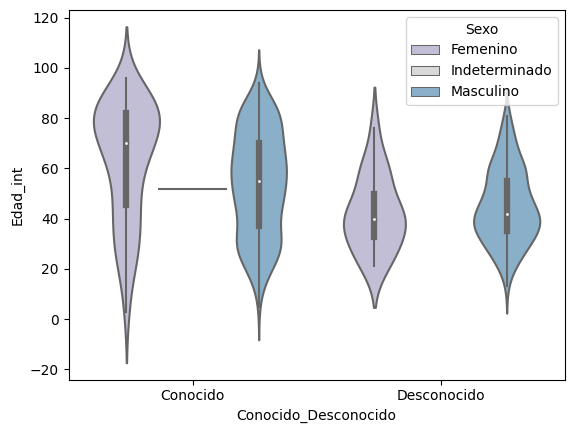

In [64]:
sns.violinplot(df, x='Conocido_Desconocido', y='Edad_int', hue='Sexo', palette=dic_col)

In [65]:
df_fecha_tipo = pd.pivot_table(df, index='Fecha_defunción_date_diasemana', columns='Restos_tipo', 
                              values='Panteón_origen', aggfunc='count')
df_fecha_tipo

Restos_tipo,Cadáver,Restos humanos,Restos cremados,Restos óseos,Feto,Miembros
Fecha_defunción_date_diasemana,,,,,,
Lunes,91,0,22,0,7,0
Martes,105,0,14,0,4,0
Miércoles,104,0,17,0,6,0
Jueves,93,0,13,0,4,0
Viernes,98,0,9,0,4,0
Sábado,106,0,15,0,3,1
Domingo,110,0,10,0,6,0


<Axes: xlabel='Restos_tipo', ylabel='Fecha_defunción_date_diasemana'>

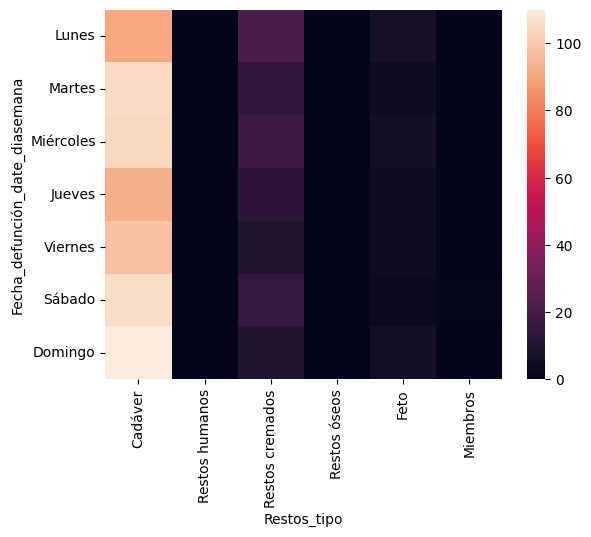

In [66]:
sns.heatmap(df_fecha_tipo)

[Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, '')]

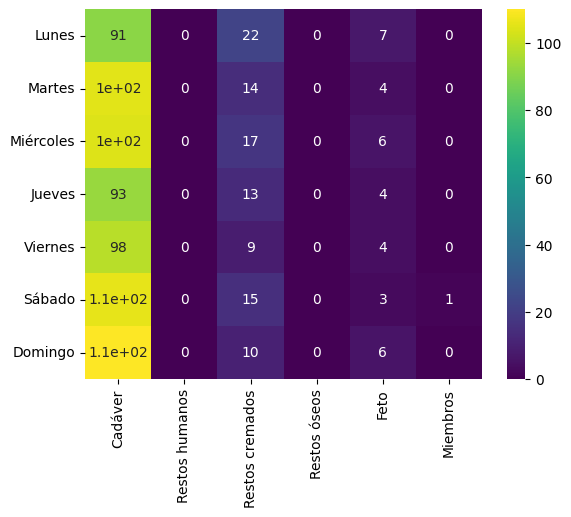

In [67]:
ax = sns.heatmap(df_fecha_tipo, annot=True, cmap='viridis')
ax.set(xlabel='', ylabel='')

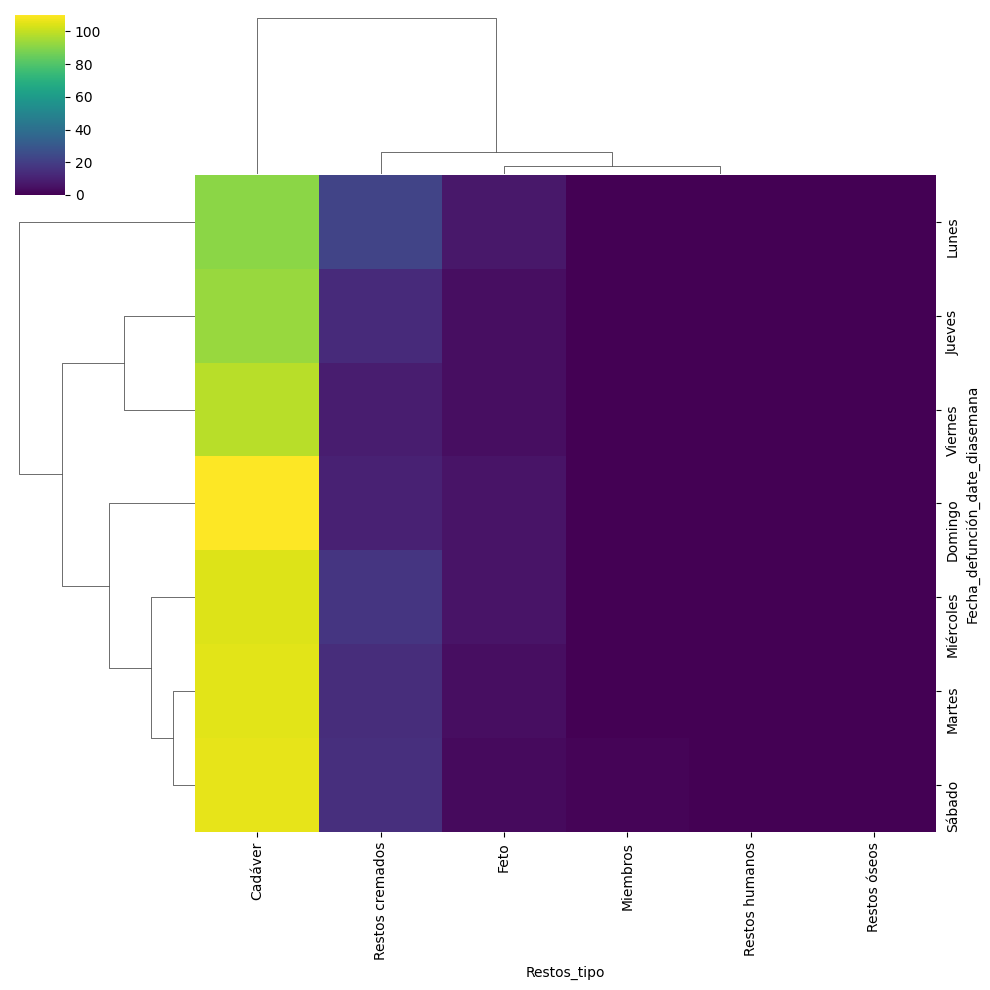

In [68]:
sns.clustermap(df_fecha_tipo, cmap='viridis')

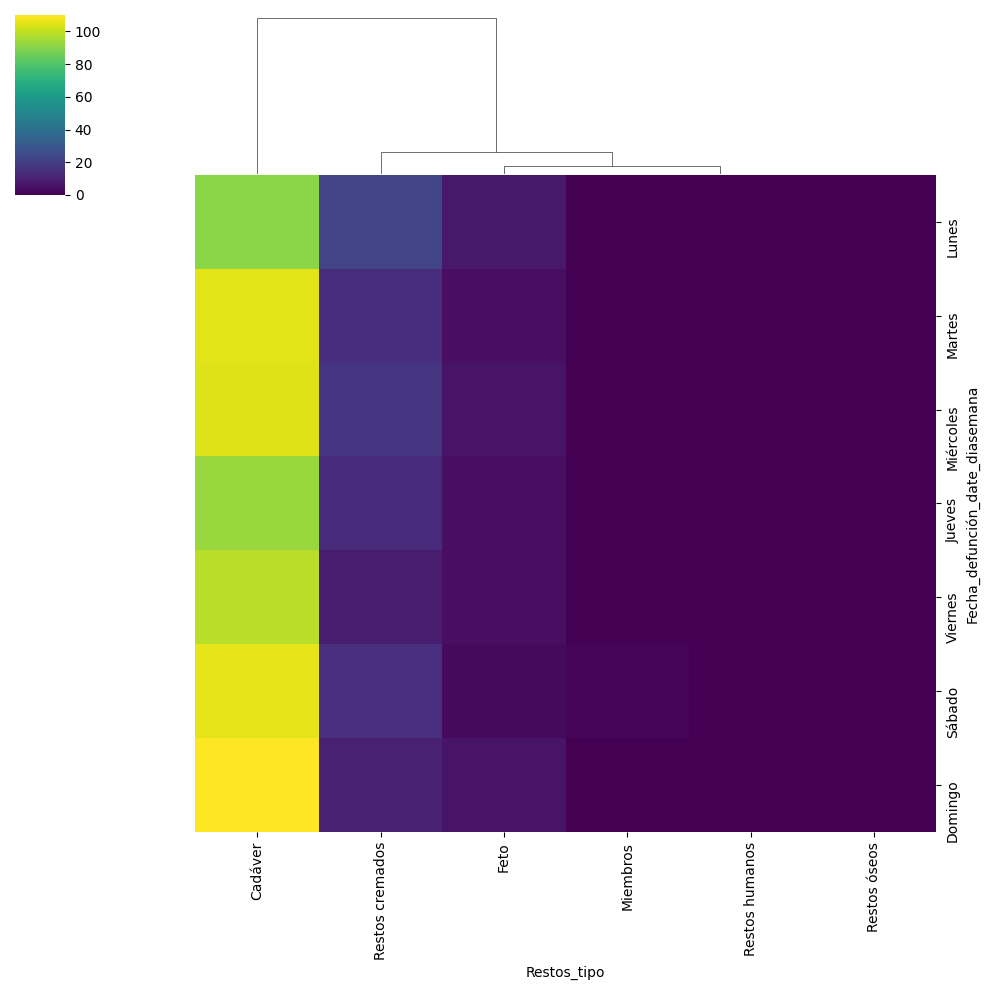

In [69]:
sns.clustermap(df_fecha_tipo, cmap='viridis', row_cluster=False)